In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import holidays


In [28]:
data_path = 'Data_Output/Cleaned_Combined_Time_Series_Data.csv'
data = pd.read_csv(data_path)
data.head()

,Date,PV_Generation_kW,Grid_Import_kW,GasEngine_Generation_kW,FuelCell_Generation_kW,Electric_Load_A_kW,Cooling_Load_A_kW,Heating_Load_A_kW,HotWater_Load_A_kW,Solar_Irradiation_W,...,Wind_Direction_deg,Electric_Load_B_kW,Cooling_Load_B_kW,Heating_Load_B_kW,HotWater_Load_B_kW,Gas1_Input_GJh,Gas2_Input_GJh,FuelCell1_Input_GJh,FuelCell2_Input_GJh,FuelCell3_Input_GJh
0,2001-06-01 00:00:00,0.0,249.0,0.0,194.0,443.0,0.0,0.0,21.0,0.0,...,188.0,443.0,0.0,0.0,21.0,0.35,0.41,0.0,0.35,0.0
1,2001-06-01 01:00:00,0.0,254.0,0.0,194.0,448.0,0.0,0.0,21.0,0.0,...,183.0,448.0,0.0,0.0,21.0,0.00,0.00,0.0,0.11,0.0
2,2001-06-01 02:00:00,0.0,223.0,0.0,194.0,417.0,0.0,0.0,22.0,0.0,...,156.0,417.0,0.0,0.0,22.0,0.00,0.00,0.0,0.31,0.0
3,2001-06-01 03:00:00,0.0,232.0,0.0,194.0,426.0,0.0,0.0,23.0,0.0,...,215.0,426.0,0.0,0.0,23.0,0.00,0.00,0.0,0.37,0.0
4,2001-06-01 04:00:00,0.0,235.0,0.0,194.0,429.0,0.0,0.0,22.0,0.0,...,143.0,429.0,0.0,0.0,22.0,0.00,0.00,0.0,0.16,0.0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187752 entries, 0 to 187751
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          187752 non-null  object 
 1   PV_Generation_kW              187008 non-null  float64
 2   Grid_Import_kW                187008 non-null  float64
 3   GasEngine_Generation_kW       187008 non-null  float64
 4   FuelCell_Generation_kW        187008 non-null  float64
 5   Electric_Load_A_kW            187008 non-null  float64
 6   Cooling_Load_A_kW             170208 non-null  float64
 7   Heating_Load_A_kW             170208 non-null  float64
 8   HotWater_Load_A_kW            170208 non-null  float64
 9   Solar_Irradiation_W           187008 non-null  float64
 10  Outdoor_Air_Temp_C            187008 non-null  float64
 11  Outdoor_Air_Humidity_percent  187719 non-null  float64
 12  Wind_Speed_ms                 187008 non-nul

In [30]:
data.isnull().sum()

Date                                0
PV_Generation_kW                  744
Grid_Import_kW                    744
GasEngine_Generation_kW           744
FuelCell_Generation_kW            744
Electric_Load_A_kW                744
Cooling_Load_A_kW               17544
Heating_Load_A_kW               17544
HotWater_Load_A_kW              17544
Solar_Irradiation_W               744
Outdoor_Air_Temp_C                744
Outdoor_Air_Humidity_percent       33
Wind_Speed_ms                     744
Wind_Direction_deg                744
Electric_Load_B_kW                744
Cooling_Load_B_kW               95712
Heating_Load_B_kW               95712
HotWater_Load_B_kW              95712
Gas1_Input_GJh                    744
Gas2_Input_GJh                    744
FuelCell1_Input_GJh               744
FuelCell2_Input_GJh               744
FuelCell3_Input_GJh               744
dtype: int64

In [31]:
data.drop(['Cooling_Load_B_kW','Heating_Load_B_kW','HotWater_Load_B_kW'], axis=1, inplace=True)

In [32]:
data.isnull().sum()

Date                                0
PV_Generation_kW                  744
Grid_Import_kW                    744
GasEngine_Generation_kW           744
FuelCell_Generation_kW            744
Electric_Load_A_kW                744
Cooling_Load_A_kW               17544
Heating_Load_A_kW               17544
HotWater_Load_A_kW              17544
Solar_Irradiation_W               744
Outdoor_Air_Temp_C                744
Outdoor_Air_Humidity_percent       33
Wind_Speed_ms                     744
Wind_Direction_deg                744
Electric_Load_B_kW                744
Gas1_Input_GJh                    744
Gas2_Input_GJh                    744
FuelCell1_Input_GJh               744
FuelCell2_Input_GJh               744
FuelCell3_Input_GJh               744
dtype: int64

In [34]:
def generate_box_plots(df):
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

    if not numerical_cols:
        print("No numerical columns found in the dataset to plot.")
        return

    print(f"Found {len(numerical_cols)} numerical columns: {numerical_cols}")

    num_plots = len(numerical_cols)
    
    cols_per_row = 3
    rows = int(np.ceil(num_plots / cols_per_row))

    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 6, rows * 5))
    
    if rows > 1 or cols_per_row > 1:
        axes = axes.flatten()
    else: 
        axes = [axes]


    for i, col in enumerate(numerical_cols):
        ax = axes[i] 
        
        sns.boxplot(y=df[col], ax=ax, color='#3498db', medianprops={'color':'red'})
        
        ax.set_title(f'Box Plot of {col}', fontsize=14, fontweight='bold')
        ax.set_ylabel(col, fontsize=12)
        ax.tick_params(axis='y', labelsize=10)
        
        ax.set_xlabel('')
        
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    fig.suptitle('Distribution and Outlier Analysis of Numerical Features', 
                 fontsize=18, fontweight='heavy', y=0.98)
    
    plt.show()

Found 19 numerical columns: ['PV_Generation_kW', 'Grid_Import_kW', 'GasEngine_Generation_kW', 'FuelCell_Generation_kW', 'Electric_Load_A_kW', 'Cooling_Load_A_kW', 'Heating_Load_A_kW', 'HotWater_Load_A_kW', 'Solar_Irradiation_W', 'Outdoor_Air_Temp_C', 'Outdoor_Air_Humidity_percent', 'Wind_Speed_ms', 'Wind_Direction_deg', 'Electric_Load_B_kW', 'Gas1_Input_GJh', 'Gas2_Input_GJh', 'FuelCell1_Input_GJh', 'FuelCell2_Input_GJh', 'FuelCell3_Input_GJh']


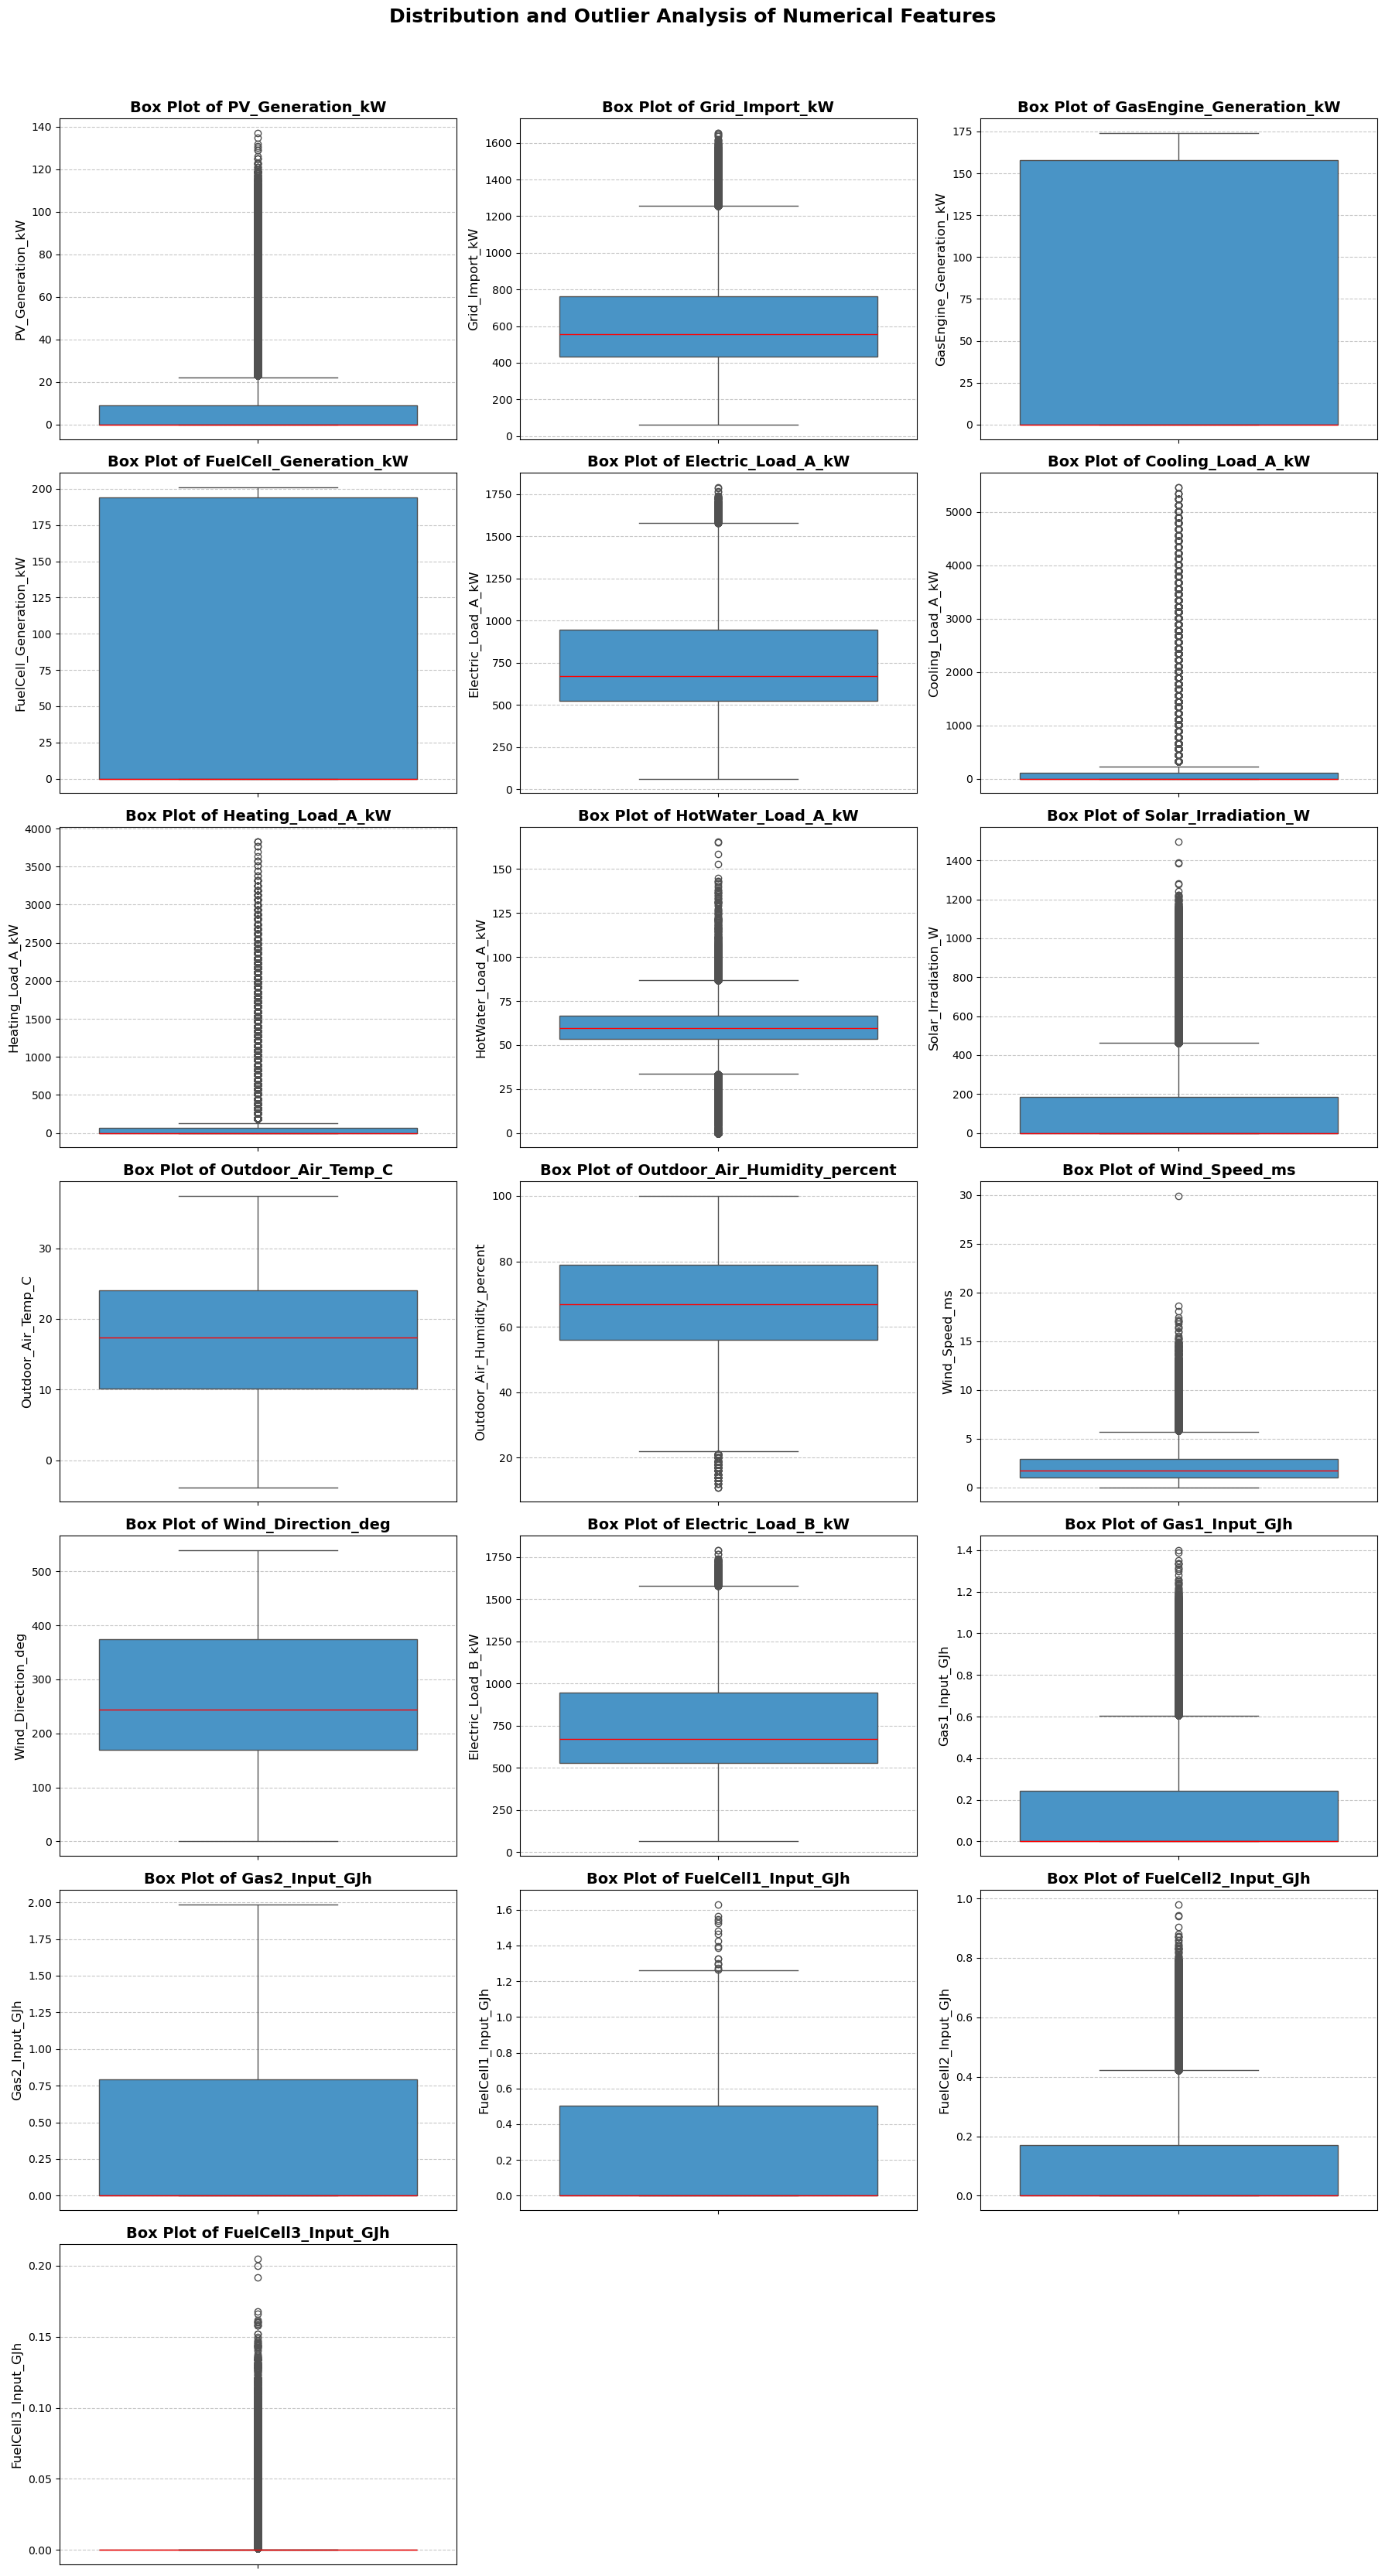

In [35]:
generate_box_plots(data)

In [36]:
def impute_with_knn(df, n_neighbors=5):
    
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    if not numerical_cols:
        print("No numerical columns found for imputation.")
        return df.copy() 

    df_imputed = df.copy()
    
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_data = imputer.fit_transform(df_imputed[numerical_cols])    
    df_imputed[numerical_cols] = pd.DataFrame(imputed_data, columns=numerical_cols, index=df_imputed.index)
    
    missing_after = df_imputed[numerical_cols].isnull().sum().sum()
    print(f"Missing values in numerical columns after imputation: {missing_after}")

    return df_imputed

In [38]:
imputed_data = impute_with_knn(data, n_neighbors=5)

Missing values in numerical columns after imputation: 0


In [39]:
imputed_data.isnull().sum()

Date                            0
PV_Generation_kW                0
Grid_Import_kW                  0
GasEngine_Generation_kW         0
FuelCell_Generation_kW          0
Electric_Load_A_kW              0
Cooling_Load_A_kW               0
Heating_Load_A_kW               0
HotWater_Load_A_kW              0
Solar_Irradiation_W             0
Outdoor_Air_Temp_C              0
Outdoor_Air_Humidity_percent    0
Wind_Speed_ms                   0
Wind_Direction_deg              0
Electric_Load_B_kW              0
Gas1_Input_GJh                  0
Gas2_Input_GJh                  0
FuelCell1_Input_GJh             0
FuelCell2_Input_GJh             0
FuelCell3_Input_GJh             0
dtype: int64

In [40]:
imputed_data['Date'] = pd.to_datetime(imputed_data['Date'], errors='coerce')
imputed_data = imputed_data.dropna(subset=['Date'])
imputed_data = imputed_data.set_index('Date').sort_index()

In [41]:
imputed_data['TARGET_Total_Electric_Load_kW'] = imputed_data['Electric_Load_A_kW'] + imputed_data['Electric_Load_B_kW']
print("Defined 'TARGET_Total_Electric_Load_kW' (A + B).")

Defined 'TARGET_Total_Electric_Load_kW' (A + B).


In [42]:
Q1 = imputed_data['TARGET_Total_Electric_Load_kW'].quantile(0.01)
Q3 = imputed_data['TARGET_Total_Electric_Load_kW'].quantile(0.99)
IQR = Q3 - Q1
upper_bound = Q3 + 3 * IQR 
lower_bound = max(0, Q1 - 3 * IQR)
imputed_data['TARGET_Total_Electric_Load_kW'] = imputed_data['TARGET_Total_Electric_Load_kW'].clip(lower=lower_bound, upper=upper_bound)
print("Final imputation and target outlier capping complete.")

Final imputation and target outlier capping complete.


In [44]:
imputed_data['Hour'] = imputed_data.index.hour
imputed_data['DayOfWeek'] = imputed_data.index.dayofweek 

imputed_data['Hour_sin'] = np.sin(2 * np.pi * imputed_data['Hour'] / 24)
imputed_data['Hour_cos'] = np.cos(2 * np.pi * imputed_data['Hour'] / 24)
imputed_data['DayOfWeek_sin'] = np.sin(2 * np.pi * imputed_data['DayOfWeek'] / 7)
imputed_data['DayOfWeek_cos'] = np.cos(2 * np.pi * imputed_data['DayOfWeek'] / 7)
imputed_data['Wind_Direction_sin'] = np.sin(2 * np.pi * imputed_data['Wind_Direction_deg'] / 360)
imputed_data['Wind_Direction_cos'] = np.cos(2 * np.pi * imputed_data['Wind_Direction_deg'] / 360)

BASE_TEMP = 18.0

imputed_data['HDD'] = (BASE_TEMP - imputed_data['Outdoor_Air_Temp_C']).clip(lower=0)
imputed_data['CDD'] = (imputed_data['Outdoor_Air_Temp_C'] - BASE_TEMP).clip(lower=0)

imputed_data['Temp_Stress_x_Hour'] = abs(imputed_data['Outdoor_Air_Temp_C'] - BASE_TEMP) * imputed_data['Hour']
imputed_data['Is_Solar_Active'] = (imputed_data['Solar_Irradiation_W'] > 50).astype(int)

imputed_data['Lag_24h_Load'] = imputed_data['TARGET_Total_Electric_Load_kW'].shift(24) 
imputed_data['EWMA_24h_Load'] = imputed_data['TARGET_Total_Electric_Load_kW'].ewm(span=24).mean().shift(1)

us_holidays = holidays.US(years=imputed_data.index.year.unique())
imputed_data['Is_Holiday'] = imputed_data.index.to_series().apply(lambda date: date in us_holidays).astype(int)
imputed_data = imputed_data.drop(columns=['Hour', 'DayOfWeek', 'Wind direction'], errors='ignore')
imputed_data = imputed_data.dropna()

In [45]:
imputed_data.head()

,PV_Generation_kW,Grid_Import_kW,GasEngine_Generation_kW,FuelCell_Generation_kW,Electric_Load_A_kW,Cooling_Load_A_kW,Heating_Load_A_kW,HotWater_Load_A_kW,Solar_Irradiation_W,Outdoor_Air_Temp_C,...,DayOfWeek_cos,Wind_Direction_sin,Wind_Direction_cos,HDD,CDD,Temp_Stress_x_Hour,Is_Solar_Active,Lag_24h_Load,EWMA_24h_Load,Is_Holiday
Date,,,,,,,,,,,,,,,,,,,,,
2001-06-02 00:00:00,0.0,220.0,0.0,194.0,414.0,0.0,0.0,20.0,0.0,19.5,...,-0.222521,-0.669131,-0.743145,0.0,1.5,0.0,0,886.0,1255.499994,0
2001-06-02 01:00:00,0.0,193.0,0.0,174.0,367.0,0.0,0.0,21.0,0.0,18.6,...,-0.222521,-0.484810,-0.874620,0.0,0.6,0.6,0,896.0,1216.442657,0
2001-06-02 02:00:00,0.0,189.0,0.0,162.0,351.0,0.0,0.0,21.0,0.0,18.4,...,-0.222521,-0.515038,-0.857167,0.0,0.4,0.8,0,834.0,1172.860823,0
2001-06-02 03:00:00,0.0,182.0,0.0,151.0,333.0,0.0,0.0,22.0,0.0,18.4,...,-0.222521,-0.469472,-0.882948,0.0,0.4,1.2,0,852.0,1130.760383,0
2001-06-02 04:00:00,0.0,184.0,0.0,151.0,335.0,0.0,0.0,22.0,0.0,18.5,...,-0.222521,-0.422618,-0.906308,0.0,0.5,2.0,0,858.0,1089.592848,0


In [46]:
imputed_data.describe()

,PV_Generation_kW,Grid_Import_kW,GasEngine_Generation_kW,FuelCell_Generation_kW,Electric_Load_A_kW,Cooling_Load_A_kW,Heating_Load_A_kW,HotWater_Load_A_kW,Solar_Irradiation_W,Outdoor_Air_Temp_C,...,DayOfWeek_cos,Wind_Direction_sin,Wind_Direction_cos,HDD,CDD,Temp_Stress_x_Hour,Is_Solar_Active,Lag_24h_Load,EWMA_24h_Load,Is_Holiday
count,187728.000000,187728.000000,187728.000000,187728.000000,187728.000000,187728.000000,187728.000000,187728.000000,187728.000000,187728.000000,...,187728.000000,187728.000000,187728.000000,187728.000000,187728.000000,187728.000000,187728.000000,187728.000000,187728.000000,187728.000000
mean,10.164205,611.286209,48.704041,81.303525,751.452228,207.383124,158.057894,53.382034,145.015788,17.079189,...,0.000179,0.109008,-0.077165,3.961451,3.040639,79.992149,0.366248,1502.904296,1502.906696,0.030811
std,21.370533,260.600764,73.457763,89.210968,282.414956,573.633412,401.979296,21.263118,250.325491,8.106602,...,0.707103,0.709441,0.691998,4.963176,4.122265,72.282607,0.481780,564.825597,333.210623,0.172805
min,0.000000,63.000000,0.000000,0.000000,63.000000,0.000000,0.000000,0.000000,0.000000,-3.800000,...,-0.900969,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,126.000000,584.835317,0.000000
25%,0.000000,434.000000,0.000000,0.000000,527.000000,0.000000,0.000000,50.281800,0.000000,10.200000,...,-0.900969,-0.559193,-0.798636,0.000000,0.000000,20.700000,0.000000,1054.000000,1262.328111,0.000000
50%,0.000000,554.000000,0.000000,0.000000,671.000000,0.000000,0.000000,58.615800,0.039000,17.400000,...,-0.222521,0.121869,-0.034899,0.600000,0.000000,60.500000,0.000000,1342.000000,1482.504230,0.000000
75%,9.000000,761.250000,158.000000,194.000000,947.000000,0.000000,63.793400,65.838600,187.000000,24.000000,...,0.623490,0.857167,0.529919,7.800000,6.000000,121.000000,1.000000,1894.000000,1724.081787,0.000000
max,137.000000,1653.000000,174.000000,201.000000,1790.000000,5459.825000,3827.604000,165.568800,1496.000000,37.400000,...,1.000000,1.000000,1.000000,21.800000,19.400000,485.300000,1.000000,3580.000000,2654.796565,1.000000


In [47]:
imputed_data.to_csv('Data_Output/Final_Feature_Engineered_Data.csv', index=True)